<a href="https://colab.research.google.com/github/JmB17/Personal-Project/blob/main/Classification_Prediction_on_Cirrhosis_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Cirrhosis**

Justice Mansfield-Beaulieu

# Project Overview

Using the data collected from the Mayo Clinic trial in 1974 to 1984, we are going to predict the stage the disease is at based the data collected during clinicl trial.

# Data Dictionary

1) ID: unique identifier

2) N_Days: number of days between
registration and the earlier of death, transplantation, or study analysis time in July 1986

3) Status: status of the patient C
(censored), CL (censored due to liver tx), or D (death)

4) Drug: type of drug D-penicillamine or placebo

5) Age: age in [days]

6) Sex: M (male) or F (female)

7) Ascites: presence of ascites N (No) or Y (Yes)

8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)

9) Spiders: presence of spiders N (No) or Y (Yes)

10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

11) Bilirubin: serum bilirubin in [mg/dl]

12) Cholesterol: serum cholesterol in [mg/dl]

13) Albumin: albumin in [gm/dl]

14) Copper: urine copper in [ug/day]

15) Alk_Phos: alkaline phosphatase in [U/liter]

16) SGOT: SGOT in [U/ml]

17) Triglycerides: triglicerides in [mg/dl]

18) Platelets: platelets per cubic [ml/1000]

19) Prothrombin: prothrombin time in seconds [s]

20) Stage: histologic stage of disease (1, 2, 3, or 4)

# Load and Inspect Data

In [2]:
# Import Libraries

# Pandas
import pandas as pd
# Numpy
import numpy as np
# Seaborn
import seaborn as sns
# MatplotLib
import matplotlib.pyplot as plt
import matplotlib as mpl
import missingno as msno

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

# Modeling
from sklearn.dummy import DummyClassifier #Baseline model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier


## Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             confusion_matrix, PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report, RocCurveDisplay)

from sklearn import metrics

## Import SMOTE
## Import special pipeline for smote
from imblearn.pipeline import make_pipeline as smote_pipe

## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

## Display all columns
pd.set_option('display.max_column', None)

In [3]:
# Printing the current version of these packages in Colab
print('- Package Versions:')
print(f'\tMatplotlib = {mpl.__version__}')
print(f'\tPandas = {pd.__version__}')
print(f'\tSeaborn = {sns.__version__}')

- Package Versions:
	Matplotlib = 3.7.1
	Pandas = 1.5.3
	Seaborn = 0.12.2


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Import Cirrhosis Prediction Data

df = pd.read_csv('/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/cirrhosis.csv')

# Create copy of original data for Machine learning late
# df_ml = df.copy()

In [7]:
# Display first 5 rows
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [8]:
# Use .info() to show rows and columns
df.info()
# 418 rows and 20 columns
# There are 13 Numerical datatypes(3-Int, 10-Floats)
# There are 7 categorical datatypes(7 Strings)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

# Data Cleaning

## Check Data Types

In [9]:
# Display categorical datatypes columns
df.select_dtypes(include='object')

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,D,D-penicillamine,F,Y,Y,Y,Y
1,C,D-penicillamine,F,N,Y,Y,N
2,D,D-penicillamine,M,N,N,N,S
3,D,D-penicillamine,F,N,Y,Y,S
4,CL,Placebo,F,N,Y,Y,N
...,...,...,...,...,...,...,...
413,D,NaN,F,NaN,NaN,NaN,N
414,C,NaN,F,NaN,NaN,NaN,N
415,C,NaN,F,NaN,NaN,NaN,N
416,C,NaN,F,NaN,NaN,NaN,N


All of these columns are looking okay for now, I see null values but we will handle these later on.

In [10]:
# Display numerical int datatype columns
df.select_dtypes(include='number')

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,24472,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,14245,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,20819,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,21185,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


All of the numeric column are looking good except the 'ID' column, this column seems useless since we already have a base index when creating the Dataframe. Lets drop this column.

In [11]:
df = df.drop(columns=['ID'])

In [12]:
# Check if column is dropped
df.select_dtypes('object')

# The column is successfully removed

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,D,D-penicillamine,F,Y,Y,Y,Y
1,C,D-penicillamine,F,N,Y,Y,N
2,D,D-penicillamine,M,N,N,N,S
3,D,D-penicillamine,F,N,Y,Y,S
4,CL,Placebo,F,N,Y,Y,N
...,...,...,...,...,...,...,...
413,D,NaN,F,NaN,NaN,NaN,N
414,C,NaN,F,NaN,NaN,NaN,N
415,C,NaN,F,NaN,NaN,NaN,N
416,C,NaN,F,NaN,NaN,NaN,N


## Checking for Duplicate Rows

In [13]:
# Checking for duplicate data
# Create a filter that identitfies duplicate rows
duplicated_rows = df.duplicated()

# Get sum of sum of duplicated rows filter
duplicated_rows.sum()
# We have 0 duplicate rows which is great

0

## Inspect Values for Errors

### Numerical Columns

In [14]:
df.describe(include='number')

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


All of the numeric values look okay for now,
Since age is measured in days and not years, thats why the values are so high. We are most likely going to convert that to years for easier to read data.

In [15]:
# Change Age column count from Days to Years
df['Age'] = df['Age']/365

In [16]:
df['Age'].value_counts()

54.038356    7
52.035616    6
51.035616    6
64.043836    5
62.043836    5
            ..
42.668493    1
52.863014    1
51.268493    1
55.495890    1
35.024658    1
Name: Age, Length: 344, dtype: int64

In [17]:
# Round Age column to whole numbers
df['Age'] = df['Age'].round()

In [18]:
df['Age'].value_counts()

56.0    20
49.0    18
52.0    18
54.0    18
46.0    17
53.0    15
41.0    15
51.0    14
50.0    14
44.0    13
43.0    13
47.0    12
63.0    12
62.0    11
55.0    11
57.0    11
61.0    11
59.0    10
45.0    10
64.0     9
35.0     9
33.0     9
38.0     9
39.0     9
34.0     8
48.0     8
37.0     8
40.0     8
58.0     7
66.0     7
42.0     7
36.0     7
67.0     7
69.0     6
60.0     6
70.0     4
68.0     4
65.0     4
31.0     4
75.0     3
71.0     3
30.0     2
29.0     1
72.0     1
77.0     1
32.0     1
73.0     1
78.0     1
26.0     1
Name: Age, dtype: int64

In [19]:
df.describe(include='number')

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,50.772727,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,10.442880,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,43.000000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,51.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,58.000000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,78.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


### Categorical Columns

In [20]:
df.describe(exclude='number')

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,418,312,418,312,312,312,418
unique,3,2,2,2,2,2,3
top,C,D-penicillamine,F,N,Y,N,N
freq,232,158,374,288,160,222,354


In [21]:
# Show the string columns
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

In [22]:
# Show values counts for all categorical columns
for col in string_cols:
  print(f'Value Counts for {col}')
  print(df[col].value_counts())
  print('\n')

Value Counts for Status
C     232
D     161
CL     25
Name: Status, dtype: int64


Value Counts for Drug
D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64


Value Counts for Sex
F    374
M     44
Name: Sex, dtype: int64


Value Counts for Ascites
N    288
Y     24
Name: Ascites, dtype: int64


Value Counts for Hepatomegaly
Y    160
N    152
Name: Hepatomegaly, dtype: int64


Value Counts for Spiders
N    222
Y     90
Name: Spiders, dtype: int64


Value Counts for Edema
N    354
S     44
Y     20
Name: Edema, dtype: int64




In [23]:
# Change Sex column from F & M to binary values
df['Sex'].replace({'F':1, 'M':0}, inplace=True)
df.rename(columns={'Sex':'IsFemale'}, inplace=True)
df['IsFemale'].value_counts()

1    374
0     44
Name: IsFemale, dtype: int64

In [24]:
# Changed Ascities Column to binary data since it was Y or N
df['Ascites'].replace({'Y':1, 'N':0}, inplace=True)
df.rename(columns={'Ascites':'HasAscites'}, inplace=True)
df['HasAscites'].value_counts()

0.0    288
1.0     24
Name: HasAscites, dtype: int64

In [25]:
# Changed Hepatomegaly Column to binary data since it was Y or N
df['Hepatomegaly'].replace({'Y':1, 'N':0}, inplace=True)
df.rename(columns={'Hepatomegaly':'HasHepatomegaly'}, inplace=True)
df['HasHepatomegaly'].value_counts()

1.0    160
0.0    152
Name: HasHepatomegaly, dtype: int64

In [26]:
# Changed Spiders Column to binary data since it was Y or N
df['Spiders'].replace({'Y':1, 'N':0}, inplace=True)
df.rename(columns={'Spiders':'HasSpiders'}, inplace=True)
df['HasSpiders'].value_counts()

0.0    222
1.0     90
Name: HasSpiders, dtype: int64

All categorical columns match the data dictionary and doesn't show any inconsistance values. I changed some of the columns that had Yes and No values to 1 and 0 to make our features better for classification.

## Checking for Unique Values

In [27]:
# Check number of unquie values for each column
df.nunique()

N_Days             399
Status               3
Drug                 2
Age                 49
IsFemale             2
HasAscites           2
HasHepatomegaly      2
HasSpiders           2
Edema                3
Bilirubin           98
Cholesterol        201
Albumin            154
Copper             158
Alk_Phos           295
SGOT               179
Tryglicerides      146
Platelets          243
Prothrombin         48
Stage                4
dtype: int64

In [28]:
# Get % of unquie values for each column
df.nunique() / len(df) * 100

N_Days             95.454545
Status              0.717703
Drug                0.478469
Age                11.722488
IsFemale            0.478469
HasAscites          0.478469
HasHepatomegaly     0.478469
HasSpiders          0.478469
Edema               0.717703
Bilirubin          23.444976
Cholesterol        48.086124
Albumin            36.842105
Copper             37.799043
Alk_Phos           70.574163
SGOT               42.822967
Tryglicerides      34.928230
Platelets          58.133971
Prothrombin        11.483254
Stage               0.956938
dtype: float64

## Identify Missing Values

In [29]:
# Create a filter showing the sum of Null values in all columns
null_sum = df.isna().sum()
# print filter
null_sum

N_Days               0
Status               0
Drug               106
Age                  0
IsFemale             0
HasAscites         106
HasHepatomegaly    106
HasSpiders         106
Edema                0
Bilirubin            0
Cholesterol        134
Albumin              0
Copper             108
Alk_Phos           106
SGOT               106
Tryglicerides      136
Platelets           11
Prothrombin          2
Stage                6
dtype: int64

In [30]:
# Find % of null values for each column
null_percent = null_sum/len(df)*100
null_percent

N_Days              0.000000
Status              0.000000
Drug               25.358852
Age                 0.000000
IsFemale            0.000000
HasAscites         25.358852
HasHepatomegaly    25.358852
HasSpiders         25.358852
Edema               0.000000
Bilirubin           0.000000
Cholesterol        32.057416
Albumin             0.000000
Copper             25.837321
Alk_Phos           25.358852
SGOT               25.358852
Tryglicerides      32.535885
Platelets           2.631579
Prothrombin         0.478469
Stage               1.435407
dtype: float64

 None of our columns for missing over or close to 50% of the data so it would be best to keep them and handle the missing values.

<Axes: >

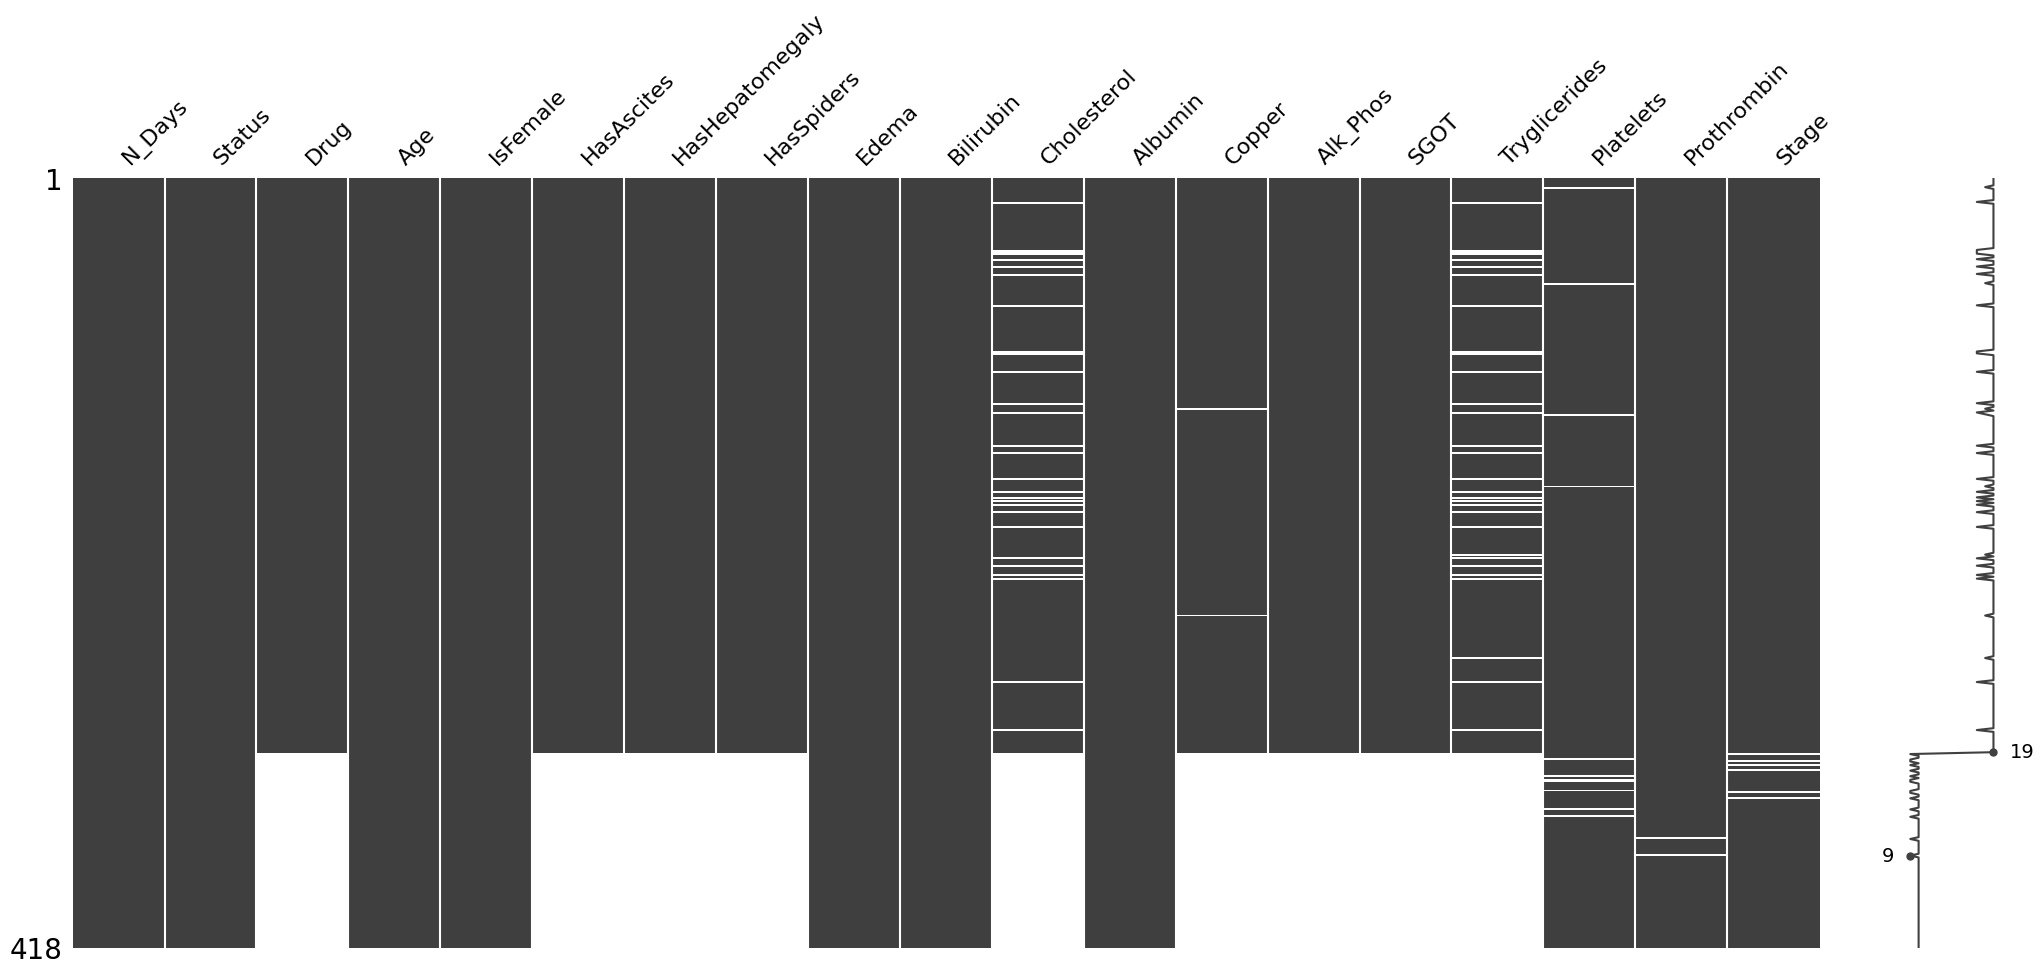

In [31]:
# Visulaize the missing values
msno.matrix(df)

Drop rows with

In [32]:
df[df['Stage'].isnull()]

,N_Days,Status,Drug,Age,IsFemale,HasAscites,HasHepatomegaly,HasSpiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
312,4062,C,NaN,60.0,1,NaN,NaN,NaN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,378.0,11.0,NaN
316,3030,C,NaN,62.0,1,NaN,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273.0,10.0,NaN
318,41,D,NaN,46.0,1,NaN,NaN,NaN,N,5.0,NaN,2.93,NaN,NaN,NaN,NaN,260.0,10.4,NaN
321,2011,D,NaN,64.0,1,NaN,NaN,NaN,N,1.1,NaN,3.69,NaN,NaN,NaN,NaN,139.0,10.5,NaN
333,466,D,NaN,56.0,1,NaN,NaN,NaN,N,7.1,NaN,3.51,NaN,NaN,NaN,NaN,721.0,11.8,NaN
336,2286,D,NaN,56.0,1,NaN,NaN,NaN,N,1.8,NaN,3.64,NaN,NaN,NaN,NaN,141.0,10.0,NaN


In [33]:
df = df.dropna(subset=['Stage'])

In [34]:
df[df['Stage'].isnull()]

,N_Days,Status,Drug,Age,IsFemale,HasAscites,HasHepatomegaly,HasSpiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


# Modeling

## Modeling Functions

### Classification Report Functions

In [35]:
## Define a function that takes in arguments and prints out a classification report and confusion matrix
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            cmap='Greens', normalize=None, classes=None,
                            figsize=(20,5), name='Classification Model',
                            average='binary', zero_division=0):
  # Gather model predictions
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)

  # Display classification report and confusion matrices
  print('====Train Set Metrics===')
  print(metrics.classification_report(y_train, train_preds,
                                      zero_division=0,
                                      target_names=classes))

  print('===Test Set Metrics===')
  print(metrics.classification_report(y_test, test_preds,
                                      zero_division=0,
                                      target_names=classes))

  fig, axes = plt.subplots(ncols=2, figsize=figsize)

  ConfusionMatrixDisplay.from_predictions(y_train, train_preds, cmap=cmap,
                                display_labels=classes,
                                normalize=normalize, ax=axes[0])
  axes[0].set_title('Train Confusion Matrix')

  ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap=cmap,
                              display_labels=classes,
                              normalize=normalize, ax=axes[1])
  axes[1].set_title('Test Confusion Matrix')
  plt.show()

  # If there are more than 2 classes and an average has not been set,
  # set average to 'macro'
  if average == 'binary' and y_train.nunique() > 2:
    average = 'macro'

  # Create a dataframe of scores to return
  scores = pd.DataFrame()

  # Training

  scores.loc[name, 'Train Accuracy'] = accuracy_score(y_train, train_preds)
  scores.loc[name, 'Train Recall'] = recall_score(y_train, train_preds,
                                                           average=average,
                                                       zero_division=zero_division)
  scores.loc[name, 'Train Precision'] = precision_score(y_train, train_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Train F1-Score'] = f1_score(y_train, train_preds,
                                                           average=average,
                                                     zero_division=zero_division)

  # Testing
  scores.loc[name, 'Test Accuracy'] = accuracy_score(y_test, test_preds)
  scores.loc[name, 'Test Recall'] = recall_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test Precision'] = precision_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test F1-Score'] = f1_score(y_test, test_preds,
                                                           average=average,
                                                     zero_division=zero_division)

  return scores


## Check Class Balance

In [36]:
df['Stage'].value_counts(normalize=True)

3.0    0.376214
4.0    0.349515
2.0    0.223301
1.0    0.050971
Name: Stage, dtype: float64

## Train/Test Split

In [37]:
# Define X and y Features

X = df.drop(columns=['Stage', 'N_Days'])
y = df['Stage']

Dropped "N_Days' Column due to high cardinality, we can see when looking at the unique values of N_Days column, 95% of its values are unique. Removing the column from our X train and test so it doesn't impact performance.

In [38]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 104 to 102
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Status           309 non-null    object 
 1   Drug             235 non-null    object 
 2   Age              309 non-null    float64
 3   IsFemale         309 non-null    int64  
 4   HasAscites       235 non-null    float64
 5   HasHepatomegaly  235 non-null    float64
 6   HasSpiders       235 non-null    float64
 7   Edema            309 non-null    object 
 8   Bilirubin        309 non-null    float64
 9   Cholesterol      211 non-null    float64
 10  Albumin          309 non-null    float64
 11  Copper           233 non-null    float64
 12  Alk_Phos         235 non-null    float64
 13  SGOT             235 non-null    float64
 14  Tryglicerides    209 non-null    float64
 15  Platelets        301 non-null    float64
 16  Prothrombin      308 non-null    float64
dtypes: float64(13)

## Column Selectors

Ordinal features: N/A

Categorical features: Status, Drug, Edema.

Numerical features: Age, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Sex, Ascities, Hepatomegaly, Spiders  

In [40]:
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_include='object')
print(num_cols(X_train))
print()
print(cat_cols(X_train))

['Age', 'IsFemale', 'HasAscites', 'HasHepatomegaly', 'HasSpiders', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

['Status', 'Drug', 'Edema']


## Transformers

In [41]:
# Scaler
scaler = StandardScaler()
# Imputer
median_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')
# One Hot Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

## Pipelines

In [42]:
# Numerical Pipeline
num_pipe = make_pipeline(median_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [43]:
# Categorcial Pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

## Column Transformer

In [44]:
num_tuple = (num_pipe, num_cols)
cat_tuple = (cat_pipe, cat_cols)

## Preprocessor

In [45]:
preprocessor = make_column_transformer(num_tuple,
                                       cat_tuple,
                                       verbose_feature_names_out=False,
                                       remainder='drop')

## Baseline Model

In [46]:
# Instantiate the Model
dummy = DummyClassifier(strategy='most_frequent')
# Make pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)
# Fit pipeline on Training Data
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58310>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58e50>)],
                                   verbose_feature_names_out=False)),
                ('dummyclassifier', DummyClassifier(strategy='most_frequent'))])

### Dummmy Metrics

In [47]:
# Get predictions
dummy_train_preds = dummy_pipe.predict(X_train)
dummy_test_preds = dummy_pipe.predict(X_test)

====Train Set Metrics===
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        14
         2.0       0.00      0.00      0.00        70
         3.0       0.37      1.00      0.54       115
         4.0       0.00      0.00      0.00       110

    accuracy                           0.37       309
   macro avg       0.09      0.25      0.14       309
weighted avg       0.14      0.37      0.20       309

===Test Set Metrics===
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00        22
         3.0       0.39      1.00      0.56        40
         4.0       0.00      0.00      0.00        34

    accuracy                           0.39       103
   macro avg       0.10      0.25      0.14       103
weighted avg       0.15      0.39      0.22       103



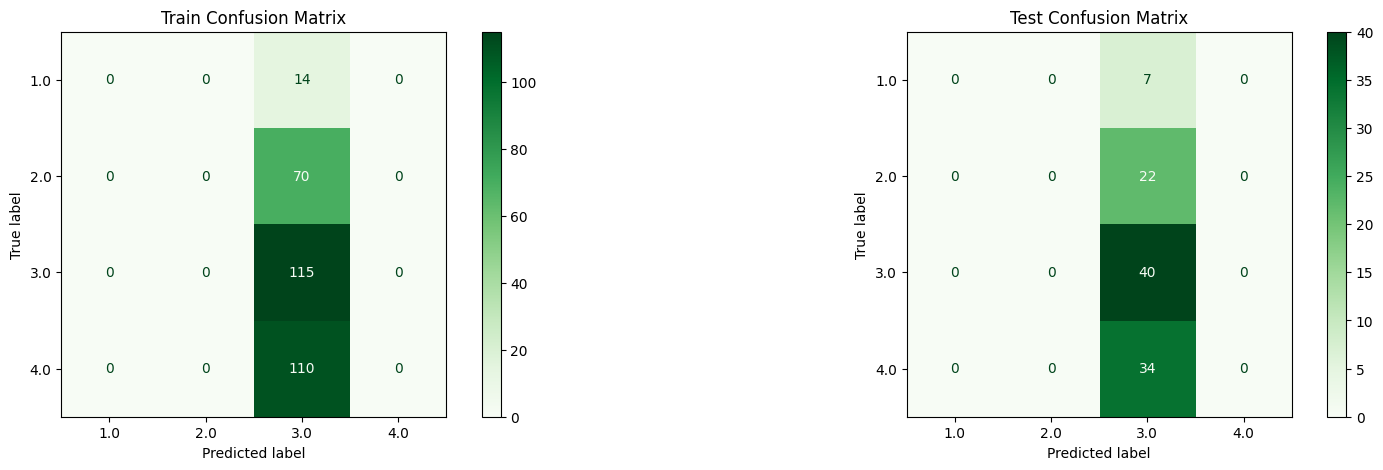

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Classification Model,0.372168,0.25,0.093042,0.135613,0.38835,0.25,0.097087,0.13986


In [48]:
evaluate_classification(dummy, X_train, y_train, X_test, y_test)

## Random Forest Model

In [49]:
# Instantiate the Model
rf = RandomForestClassifier(random_state = 42)
# Make pipeline
rf_pipe = make_pipeline(preprocessor, rf)
# Fit pipeline on Training Data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58310>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58e50>)],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [50]:
# Get predictions
rf_train_preds = rf_pipe.predict(X_train)
rf_test_preds = rf_pipe.predict(X_test)

====Train Set Metrics===
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        70
         3.0       1.00      1.00      1.00       115
         4.0       1.00      1.00      1.00       110

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309

===Test Set Metrics===
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.19      0.18      0.19        22
         3.0       0.49      0.57      0.53        40
         4.0       0.54      0.56      0.55        34

    accuracy                           0.45       103
   macro avg       0.31      0.33      0.32       103
weighted avg       0.41      0.45      0.43       103



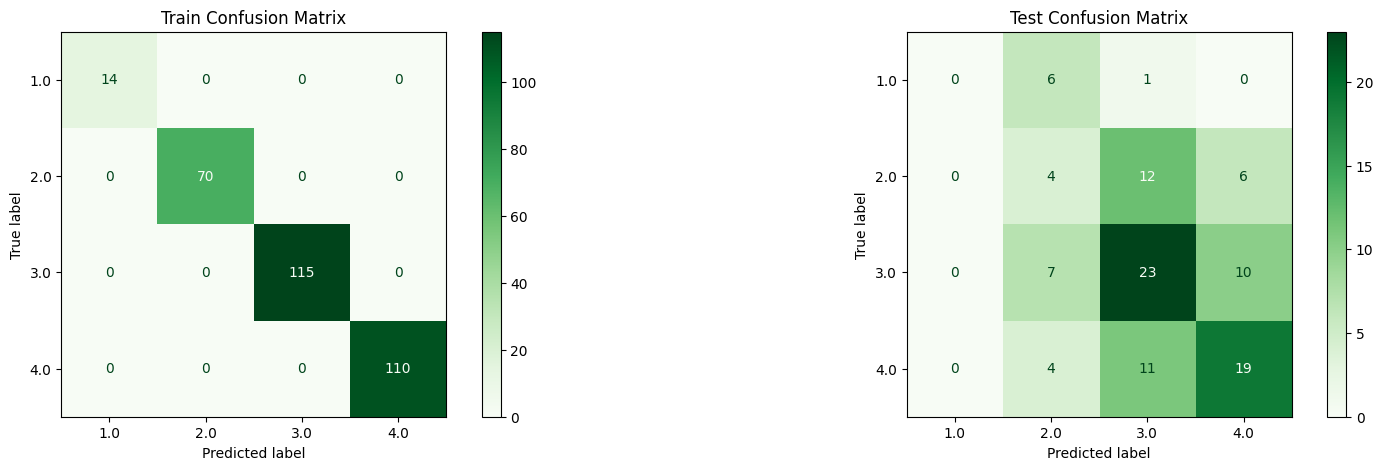

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Classification Model,1.0,1.0,1.0,1.0,0.446602,0.32891,0.305674,0.316377


In [51]:
evaluate_classification(rf_pipe, X_train, y_train, X_test, y_test)

### Random Forest Tuning


In [52]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58310>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
             

In [74]:
rf_params = {'randomforestclassifier__n_estimators': [10,20,30,40,50,60,70,80,90,100,150,200],
             'randomforestclassifier__max_features': ['sqrt', 'log2', None],
             'randomforestclassifier__max_depth': range(2,20)}

In [87]:
rf_pipe_gs = GridSearchCV(rf_pipe, rf_params)

rf_pipe_gs.fit(X_train, y_train)
print('Best RF Parameters:')
print(rf_pipe_gs.best_params_)
rf_best_pipe = rf_pipe_gs.best_estimator_
print(f'Accuracy of best RF model is: {rf_best_pipe.score(X_test, y_test)}')

Best RF Parameters:
{'randomforestclassifier__max_depth': 9, 'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 80}
Accuracy of best RF model is: 0.47572815533980584


## Decision Tree Model




In [53]:
# Instantiate the Model
dec_tree = DecisionTreeClassifier(random_state = 42)
# Make pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# Fit pipeline on Training Data
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58310>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58e50>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [54]:
# Get predictions
dec_train_preds = dec_tree_pipe.predict(X_train)
dec_test_preds = dec_tree_pipe.predict(X_test)

====Train Set Metrics===
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        70
         3.0       1.00      1.00      1.00       115
         4.0       1.00      1.00      1.00       110

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309

===Test Set Metrics===
              precision    recall  f1-score   support

         1.0       0.12      0.14      0.13         7
         2.0       0.21      0.27      0.24        22
         3.0       0.39      0.35      0.37        40
         4.0       0.50      0.44      0.47        34

    accuracy                           0.35       103
   macro avg       0.31      0.30      0.30       103
weighted avg       0.37      0.35      0.36       103



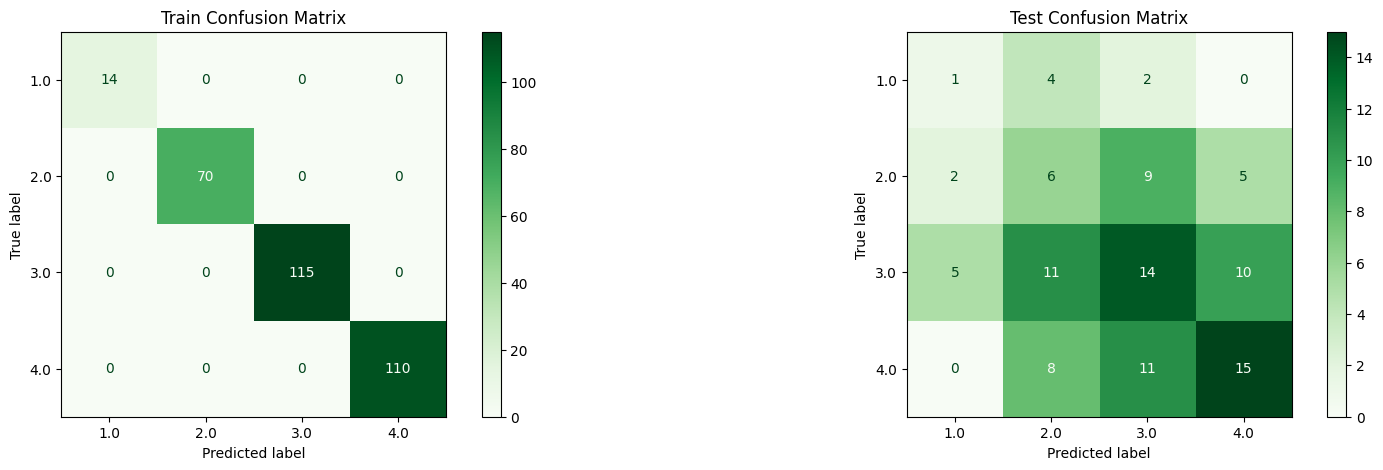

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Classification Model,1.0,1.0,1.0,1.0,0.349515,0.30169,0.305196,0.30145


In [55]:
evaluate_classification(dec_tree_pipe, X_train, y_train, X_test, y_test)

### Dec Tree Model Tuning

In [82]:
dec_tree_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58310>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
             

In [84]:
# Dictionary for hyperparametters
dec_tree_params = {'decisiontreeclassifier__max_depth': range(2,20),
                  'decisiontreeclassifier__min_samples_leaf': range(2,20),
                  'decisiontreeclassifier__min_samples_split': range(2,10)}

In [86]:
dec_tree_pipe_gs = GridSearchCV(dec_tree_pipe, dec_tree_params)

dec_tree_pipe_gs.fit(X_train, y_train)
print('Best Dec Tree Parameters:')
print(dec_tree_pipe_gs.best_params_)
dec_tree_best_pipe = dec_tree_pipe_gs.best_estimator_
print(f'Accuracy of best Dec Tree model is: {dec_tree_best_pipe.score(X_test, y_test)}')

Best Dec Tree Parameters:
{'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__min_samples_leaf': 9, 'decisiontreeclassifier__min_samples_split': 2}
Accuracy of best Dec Tree model is: 0.4077669902912621


## K Nearest Neighbors Model

In [56]:
# Instantiate the Model
knn = KNeighborsClassifier()
# Make pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit pipeline on Training Data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58310>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58e50>)],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [57]:
# Get predictions
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

====Train Set Metrics===
              precision    recall  f1-score   support

         1.0       0.75      0.21      0.33        14
         2.0       0.56      0.63      0.59        70
         3.0       0.67      0.75      0.70       115
         4.0       0.83      0.74      0.78       110

    accuracy                           0.69       309
   macro avg       0.70      0.58      0.60       309
weighted avg       0.70      0.69      0.69       309

===Test Set Metrics===
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.26      0.32      0.29        22
         3.0       0.47      0.50      0.48        40
         4.0       0.68      0.62      0.65        34

    accuracy                           0.47       103
   macro avg       0.35      0.36      0.35       103
weighted avg       0.46      0.47      0.46       103



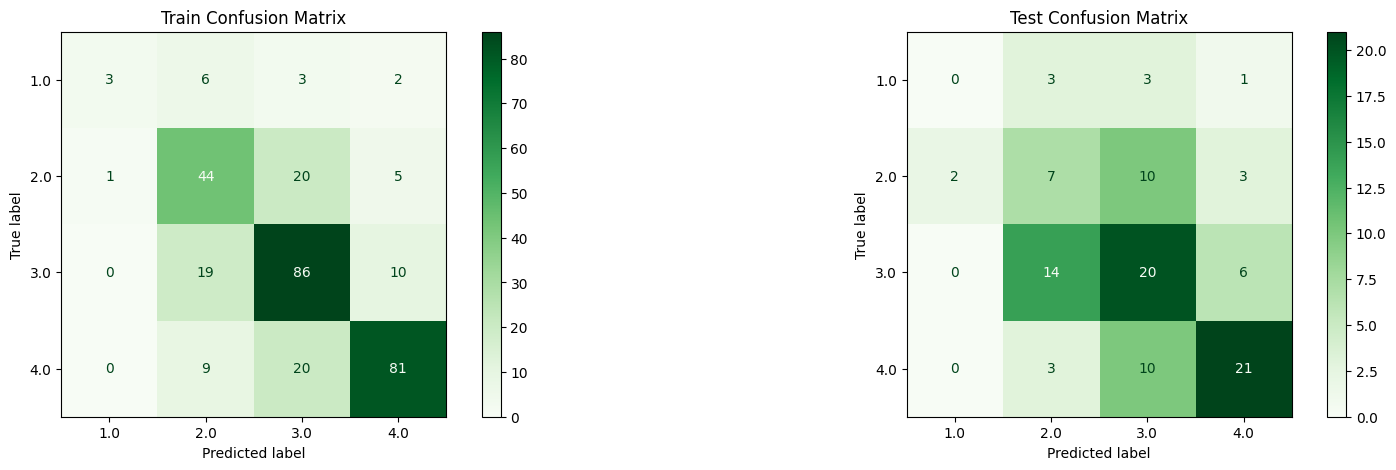

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Classification Model,0.692557,0.581762,0.701825,0.602923,0.466019,0.358957,0.350449,0.353449


In [58]:
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

### KNN Model Tuning

In [ ]:
knn_pipe.get_params()

In [90]:
# Dictionary for hyperparametters
knn_params = {'kneighborsclassifier__n_neighbors': range(1,15),
         'kneighborsclassifier__weights': ['distance', 'uniform']}

In [80]:
knn_pipe_gs = GridSearchCV(knn_pipe, knn_params)

knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
knn_best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {knn_best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 6, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.4368932038834951


## LogisticRegression Model


In [59]:
# Instantiate the Model
log_reg = LogisticRegression()
# Make pipeline
logreg_pipe = make_pipeline(preprocessor, log_reg)
# Fit pipeline on Training Data
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58310>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58e50>)],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression())])

In [60]:
# Get predictions
log_train_preds = logreg_pipe.predict(X_train)
log_test_preds = logreg_pipe.predict(X_test)

====Train Set Metrics===
              precision    recall  f1-score   support

         1.0       1.00      0.07      0.13        14
         2.0       0.45      0.36      0.40        70
         3.0       0.53      0.65      0.59       115
         4.0       0.69      0.70      0.70       110

    accuracy                           0.58       309
   macro avg       0.67      0.45      0.45       309
weighted avg       0.59      0.58      0.56       309

===Test Set Metrics===
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.26      0.27      0.27        22
         3.0       0.44      0.45      0.44        40
         4.0       0.54      0.62      0.58        34

    accuracy                           0.44       103
   macro avg       0.31      0.34      0.32       103
weighted avg       0.40      0.44      0.42       103



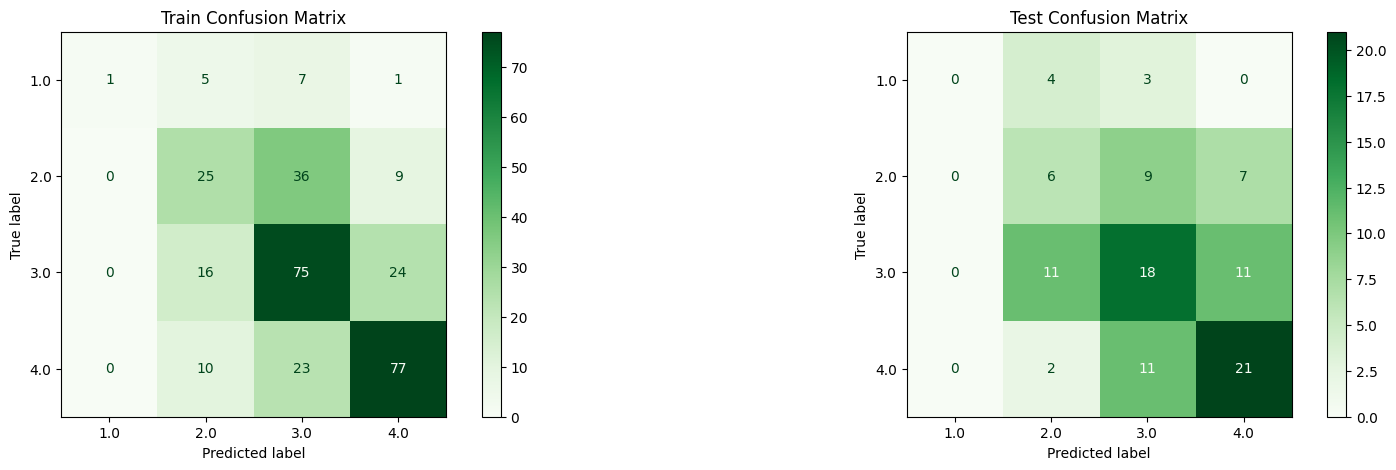

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Classification Model,0.576052,0.445186,0.668009,0.453232,0.436893,0.335094,0.309589,0.321613


In [61]:
evaluate_classification(logreg_pipe, X_train, y_train, X_test, y_test)

## LogisticRegression Model Tuning

In [89]:
logreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58310>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
             

In [91]:
# Dictionary for hyperparametters
logreg_params = {'logisticregression__C': [100, 10, 1.0, 0.1, 0.01],
              'logisticregression__penalty': ['none', 'l1', 'l2', 'elasticnet'],
              'logisticregression__solver':  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [92]:
logreg_pipe_gs = GridSearchCV(logreg_pipe, logreg_params)

logreg_pipe_gs.fit(X_train, y_train)
print('Best LogisticRegression Parameters:')
print(logreg_pipe_gs.best_params_)
logreg_best_pipe = logreg_pipe_gs.best_estimator_
print(f'Accuracy of best LogisticRegression model is: {logreg_best_pipe.score(X_test, y_test)}')

Best LogisticRegression Parameters:
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Accuracy of best LogisticRegression model is: 0.5145631067961165


## Gradient Boosting Model

In [62]:
# Instantiate the Model
gbc = GradientBoostingClassifier()
# Make pipeline
gbc_pipe = make_pipeline(preprocessor, gbc)
# Fit pipeline on Training Data
gbc_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58310>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58e50>)],
                                   verbose_feature_names_out=False)),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [63]:
# Get predictions
gbc_train_preds = gbc_pipe.predict(X_train)
gbc_test_preds = gbc_pipe.predict(X_test)

====Train Set Metrics===
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        70
         3.0       1.00      1.00      1.00       115
         4.0       1.00      1.00      1.00       110

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309

===Test Set Metrics===
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.26      0.23      0.24        22
         3.0       0.52      0.60      0.56        40
         4.0       0.66      0.74      0.69        34

    accuracy                           0.52       103
   macro avg       0.36      0.39      0.37       103
weighted avg       0.48      0.52      0.50       103



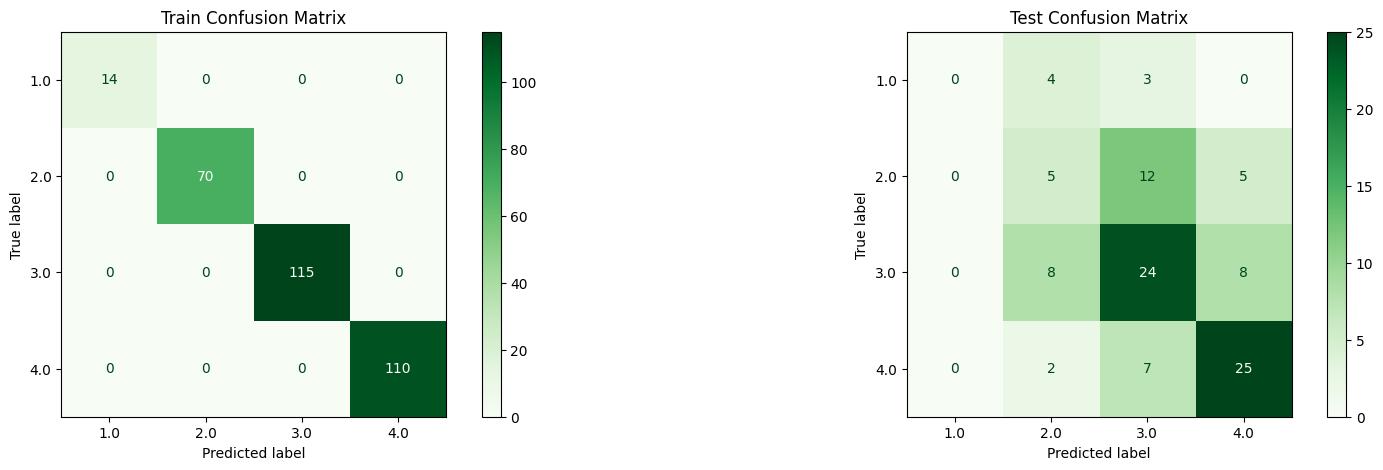

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Classification Model,1.0,1.0,1.0,1.0,0.524272,0.390642,0.360698,0.374122


In [64]:
evaluate_classification(gbc_pipe, X_train, y_train, X_test, y_test)

## Gradient Boosting Model

In [94]:
gbc_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ad27fe58310>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
             

In [95]:
# Dictionary for hyperparametters
gbc_params = {'gradientboostingclassifier__max_features': [1, 2, 3, 5, None],
    'gradientboostingclassifier__max_leaf_nodes': [10, 100, 1000, None],
    'gradientboostingclassifier__min_samples_leaf': [1, 2, 5, 10, 20, 50, 100],}

In [96]:
gbc_pipe_gs = GridSearchCV(gbc_pipe, gbc_params)

gbc_pipe_gs.fit(X_train, y_train)
print('Best GBC Parameters:')
print(gbc_pipe_gs.best_params_)
gbc_best_pipe = gbc_pipe_gs.best_estimator_
print(f'Accuracy of best GBC model is: {gbc_best_pipe.score(X_test, y_test)}')

Best GBC Parameters:
{'gradientboostingclassifier__max_features': 3, 'gradientboostingclassifier__max_leaf_nodes': 1000, 'gradientboostingclassifier__min_samples_leaf': 20}
Accuracy of best GBC model is: 0.5436893203883495
